# Uygulama Notları: 6
## FİZ220 - Bilgisayar Programlama II | 21/04/2020

**Matris Uygulamaları**

* Gerçek Hayattan Bilgisayara
* Yine: _n_ bilinmeyenli _n_ denklem
  * _🎼 O yana da dönder, sar beni... (ya da: dönüş matrisi) ♫_
      * Dönüş matrisinin sıfırdan çıkarımı
      * _Bunları öğrendiğimize göre..._
* Grup Teorisi
    * Grup teorinin dört atlısı
    * Yine gene dönelim
    * Çarpım cetveli (Cayley tablosu)
    * Niobyum Tetratellurid
* Bağlantılar
    
Dr. Emre S. Taşcı, emre.tasci@hacettepe.edu.tr  
Fizik Mühendisliği Bölümü  
Hacettepe Üniversitesi

## Gerçek Hayattan Bilgisayara
Matematik kendi başına yeterince ilginç olsa da, üstüne bir de gerçek dünyamızda/evrenimizde gerçekleşen etkileşmeleri modelleme ve soyutlama yoluyla bilgisayara geçirip üzerlerinde oynamamıza, incelememize izin verir. Nicelikleri sayılarla, skalerler ve vektörlerle; bu niceliklerin üzerine etkiyip onları değiştiren, dönüştüren işlemleri ise matrislerle temsil ederiz.

## Yine: _n_ bilinmeyenli _n_ denklem
[Geçen dönem fizik problemlerinin (eğik düzlem ve elektrik devreleri) çözümünde kullandığımız _n_ bilinmeyenli _n_ denklemden mürekkep doğrusal denklem takımlarını hatırlarsak](https://emresururi.github.io/FIZ219/FIZ219_EST_UygulamaNotlari_10_Gauss_Eleme_Yontemi_ile_nxn_Dogrusal_Denklem_Cozumu.html), aslında bütün o hikayelerin ardında basitçe bir çarpım işlemi yatıyordu:

$$A\cdot\vec{x} = \vec{b}$$

Burada $\vec{x}$ _n_-boyutlu bir bilinmeyen vektörü, _A_ $(n\times n)$ boyutlu katsayılar matrisi, $\vec{b}$ de sonuçları toplayan _n_-boyutlu sonuç matrisi idi. Örneğin:$$3x+2y = 7\\x-y=-1$$ şeklindeki doğrusal denklem takımımızı:
$$\begin{bmatrix}3&2\\1&-1\end{bmatrix}\cdot\left( \begin{matrix}x\\y\end{matrix} \right)= \left(\begin{matrix}7\\-1\end{matrix}\right)$$

biçiminde, bir matrisle bir vektörün çarpımı şeklinde temsil edebiliriz. Her çarpma işleminde olduğu gibi, bilinmeyen kısmı yalnız bırakıp, sonuca ulaşabiliriz. $3\times x = 12$ gibi skaler bir çarpma işlemimiz olsaydı, kafadan iki tarafı da 3'e bölüp, $x$'i yalnız bırakırdık ama matrislerde böyle "kafadan bölme" olmadığı için, aslında bunun altında yatan asıl sebep olan _iki tarafı da soldan, 3'ün çarpma işlemine göre tersiyle çarpıp, birim değeri elde ederiz:_

$$ (3)^{-1} \left[3\times x = 12\right] \rightarrow \mathbb{1}\times x = 3^{-1}\,.12\Rightarrow x = \frac{12}{3} = 4$$

Bunu yapabildiğimize göre, yukarıdaki denklemde de iki tarafı soldan katsayılar matrisinin tersi ile çarpacak olursak:

$$
\begin{bmatrix}3&2\\1&-1\end{bmatrix}^{-1}\left[\begin{bmatrix}3&2\\1&-1\end{bmatrix}\cdot\left( \begin{matrix}x\\y\end{matrix} \right)= \left(\begin{matrix}7\\-1\end{matrix}\right)\right]\\
\mathbb{1}\cdot\left( \begin{matrix}x\\y\end{matrix} \right)= \begin{bmatrix}3&2\\1&-1\end{bmatrix}^{-1}\left(\begin{matrix}7\\-1\end{matrix}\right)
$$


In [1]:
import numpy as np
A = np.array([[3,2],[1,-1]])
b = np.array([[7],[-1]])
A_inv = np.linalg.inv(A)
print(A_inv)

[[ 0.2  0.4]
 [ 0.2 -0.6]]


In [3]:
np.dot(A_inv,A)

array([[ 1.00000000e+00, -5.55111512e-17],
       [ 0.00000000e+00,  1.00000000e+00]])

$$\left( \begin{matrix}x\\y\end{matrix} \right)= \begin{bmatrix}0.2&0.4\\0.2&-0.6\end{bmatrix}\left(\begin{matrix}7\\-1\end{matrix}\right)$$

In [46]:
print(np.dot(A_inv,b))

[[1.]
 [2.]]


$$\left( \begin{matrix}x\\y\end{matrix} \right)= \begin{bmatrix}0.2&0.4\\0.2&-0.6\end{bmatrix}\left(\begin{matrix}7\\-1\end{matrix}\right)=\left(\begin{matrix}1\\2\end{matrix}\right)\\
\boxed{x=1,\;\,y=2}$$

Katsayılar matrisinin tersini bulup, bu işlemi otomatik olarak yapan bir komut da mevcut: **`np.linalg.solve()`**

In [47]:
[[x],[y]] = np.linalg.solve(A,b)
print("x= ",x,"\ny= ",y)

x=  1.0 
y=  2.0


## _&#127932; O yana da dönder, sar beni... (ya da: dönüş matrisi) ♫_
Elimizde iki boyutlu bir uzay, bu uzayda da bir $a$ noktamız var (diyelim $a(1,0)$ noktası). Bu noktayı saat yönünün tersine, 90 derece çevirmek istiyoruz.

Kendimize en yakın fizik ya da matematik kitabını alıp açtığımızda _(ama en güzeli lineer cebir kitabını açmak olurdu bu arada ;)_, dönüş matrisi diye bir yaratıkla karşılaşıyoruz, şöyle bir şey:

$$R_{\theta}=\begin{bmatrix}\cos{\theta}&-\sin{\theta}\\\sin{\theta}&\cos{\theta}\end{bmatrix}$$

Bu <strike>yaratık</strike> matris $(2\times2)$'lik bir matris olduğundan, üzerine etkiyeceği vektör ancak 2 boyutlu bir vektör olabilir (neden?). Şansa bakın ki, elimizde tam da iki boyutlu bir vektör var (noktamızın ta kendisi).

Noktamızı 90 derece çevirmek istersek, $\theta$ yerine 90 derece (ya da _doğru_ birimlerle $\pi$ radyan) yazarız, dönüş matrisimiz de şu hali alır:

$$R_{\pi/2}=\begin{bmatrix}\cos{\frac{\pi}{2}}&-\sin{\frac{\pi}{2}}\\\sin{\frac{\pi}{2}}&\cos{\frac{\pi}{2}}\end{bmatrix}=\begin{bmatrix}0&-1\\1 & 0\end{bmatrix}$$

Bu halini $a(1,0)$ noktamız üzerine etki ettirelim bakalım ne çıkacak?

$$b=R_{\pi/2}\cdot a=\begin{bmatrix}0&-1\\1 & 0\end{bmatrix}\cdot\left(\begin{matrix}1\\0\end{matrix}\right)$$

In [48]:
R_90 = np.array([[0,-1],[1,0]])
a = np.array([[1],[0]])
b = np.dot(R_90,a)
print(b)

[[0]
 [1]]


demek ki:
$$b=R_{\pi/2}\cdot a=\begin{bmatrix}0&-1\\1 & 0\end{bmatrix}\cdot\left(\begin{matrix}1\\0\end{matrix}\right)=\left(\begin{matrix}0\\1\end{matrix}\right)$$



Sağduyumuzu kullanırsak, bu sonuç epey mantıklı görünüyor. Dönüş operatörümüzü şimdi bir de $b(0,1)$ noktası üzerine vurdursak, bence kendimizi $(-1,0)$'da buluruz. Bakalım:

In [49]:
c = np.dot(R_90,b)
print(c)

[[-1]
 [ 0]]


Aynen de öyle oldu! 8)

Allahtan o fizik/matematik/lineer cebir kitabı elimizin altındaymış da, hop diye dönüş matrisini bulabildik. Peki ya kitabı bulamamış olsaydı, internet de kesilmiş olsaydı? Gelsin denklem çözümü...

### Dönüş matrisinin sıfırdan çıkarımı
Elimizde iki boyutlu bir nokta var, onun da matematiksel temsili, iki boyutlu bir sütun vektörü, buraya kadar tamam. Dönüş operatörünün bu noktaya etki etmesiyle bir kuş, uçak ya da süpermen çıkmayacak, yine bir başka nokta çıkacak, bu da tamam (yani sonuç yine $(2\times1)$lik bir sütun vektörü olacak. O zaman buna etki edecek dönüş operatörünün temsili de mutlaka $(2\times2)$lik bir matris olmak zorunda!.. ama elimizin altında onun olduğu kitap olmadığından, sıfırdan çıkaracağız. $(2\times2)$lik bir matrisin 4 elemanı olduğuna göre, en genel haliyle $R_{\pi/2}$ matrisimizi:

$$ R_{\pi/2} = \begin{bmatrix}R_{00}& R_{01}\\R_{10}&R_{11}\end{bmatrix}$$

olarak 4 bilinmeyen bileşeniyle yazıyoruz. Matrisin 4 bilinmeyen bileşenini çözmek için 4 adet denkleme ihtiyacımız var... ama nasıl bulacağız o bileşenleri? 

**Cevap:** Kafamızı kullanarak! 8)

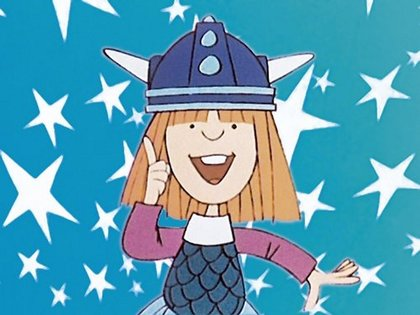
(Vikingler'in Viki)

Kafamızı kullanarak bu operatörün (1,0)'ı (0,1)'e götürdüğünü biliyoruz, yani:

$$\begin{bmatrix}R_{00}& R_{01}\\R_{10}&R_{11}\end{bmatrix}\cdot\left(\begin{matrix}1\\0\end{matrix}\right)=\left(\begin{matrix}0\\1\end{matrix}\right)$$

Bu matris çarpımını açık olarak yazarsak:
\begin{align*}
R_{00}\,.\,1 + R_{01}\,.0 &= 0\\ 
R_{10}\,.\,1 + R_{11}\,.0 &= 1
\end{align*}

\begin{align*}
R_{00} &= 0\\ 
R_{10} &= 1
\end{align*}

Elimizde iki denklem vardı, bu sebepten ancak iki bilinmeyeni bulabildik. Diğer ikisi için, iki denkleme daha ihtiyacımız var, onları da (0,1) noktasını orijin etrafında saat yönünün tersine 90 derece çevirince varacağımız (-1,0) noktasından bulabiliriz mesela:

$$\begin{bmatrix}0& R_{01}\\1&R_{11}\end{bmatrix}\cdot\left(\begin{matrix}0\\1\end{matrix}\right)=\left(\begin{matrix}-1\\0\end{matrix}\right)$$

\begin{align*}
0\,.\,0 + R_{01}\,.\,1 &= -1\\ 
1\,.\,0 + R_{11}\,.\,1 &= 0
\end{align*}

\begin{align*}
R_{01} &= -1\\ 
R_{11} &= 0
\end{align*}

Böylelikle dönüş matrisimizin bütün bilinmeyen elemanlarını bulup, matrisi sıfırdan çıkarmış olduk:

$$\boxed{R_{\pi/2} = \begin{bmatrix} 0& -1 \\1 & 0\end{bmatrix}}$$

### _Bunları öğrendiğimize göre..._
Dönüş matrislerini çıkarmanın aslında çok kolay ve doğrudan bir yolu var (üstte yaptığımız prosedürün gelişme kısmının atlanmış hali): matrisin ne yönde kaç derece döndürmesini istiyorsanız, önce (1,0) noktasına (sütun vektörüne) kafanızda uyarlayın, gittiğiniz yer dönüş matrisinizin 1. sütunu olacaktır; sonrasında da (0,1) noktasını olmasını istediğiniz şekilde döndürün, onun gittiği yerden de matrisinizin 2. sütununu bulmuş olursunuz:

$$\left(\begin{matrix}1\\0\end{matrix}\right)\mapsto\left(\begin{matrix}0\\1\end{matrix}\right)\quad,\quad
\left(\begin{matrix}0\\1\end{matrix}\right)\mapsto\left(\begin{matrix}-1\\0\end{matrix}\right)$$

$$\Rightarrow R_{\pi/2} = \left[\left(\begin{matrix}0\\1\end{matrix}\right)\left(\begin{matrix}-1\\0\end{matrix}\right)\right]
=\begin{bmatrix} 0& -1 \\1 & 0\end{bmatrix}$$

# Grup Teorisi
Grup teorisi, çok basit dört adet aksiyomun üzerine kurulan ve herhangi bir sistem (aritmetik işlemler, veriler, bileşikler/yapılar, elektron dağılımları, elektromanyetik davranışlar, insanların duyguları, geometrik şekiller, renk uyumları, vs..) bu dört aksiyomu sağladığı anda bir anda kaplan kesilen bir teoridir. Gücünü soyutlamalardan ve kısıtlamalardan alır. Uygulanan elemanlar küme elemanlarıdır, dört aksiyomu da sağlayan kümelere grup denir.

## Grup teorinin dört atlısı
Nedir bu aksiyomlar:
1. **Birim eleman:** Öyle bir grup elemanı $\mathbb{1}$ vardır ki, diğer elemanlarla işleme girdiği zaman işleme giren eleman aynı kalır:
$$ a\cdot \mathbb{1} = \mathbb{1}\cdot a = a$$
2. **Ters eleman:** Gruptaki her bir grup elemanı $a$ için öyle bir başka $b=a^{-1}$ elemanı vardır ki, birbirleriyle etkileşime girdikleri zaman sonuç birim eleman olur:
$$ a\cdot b = a \cdot a^{-1} = a^{-1}\cdot a = b\cdot a = \mathbb{1}$$
3. **Kapalılık özelliği:** $a,b$ elemanları gruba dahilse, onların etkileşimlerinin sonucu da gruba dahildir:
$$ {a,b}\in G\rightarrow a\cdot b = c \in G$$
4. **Birleşme özelliği:** Elemanların yeri değiştirilmeden, işlem sırası değiştirilirse aynı sonuç çıkar:
$$ a\cdot(b\cdot c) = (a\cdot b)\cdot c$$

Gördüğünüz gibi hayli basit ama bir o kadar da güçlü kıstaslar bunlar. Herhangi bir simetri gördüğünüz her yerde grup teorisi hüküm sürmektedir. 

## Yine gene dönelim
Biz yine dönüş matrisimizi ele alalım, bakalım bu işlemden bir grup çıkacak mı...

İlk olarak yalnız bakalım: etkilediği noktayı orijin etrafında, saat yönünün tersine, 90 derece döndüren $R_{\pi/2}$ operatörü:

$$R_{\pi/2} = \begin{bmatrix} 0& -1 \\1 & 0\end{bmatrix}$$

Herhangi bir $(x,y)$ noktasını döndürelim, örneğin $a(0.3,0.7)$ noktasını:

In [50]:
import numpy as np
R_90 = np.array([[0,-1],[1,0]])
print(R_90)
print("-"*45)
a = np.array([[0.3],[0.7]])
print(a)
print("-"*45)
b = np.dot(R_90,a)
print(b)

[[ 0 -1]
 [ 1  0]]
---------------------------------------------
[[0.3]
 [0.7]]
---------------------------------------------
[[-0.7]
 [ 0.3]]


Buraya kadar tamam, şimdi bu döndürülmüş $b(-0.7,0.3)$ noktasını 90 derece çevirelim:

In [51]:
c = np.dot(R_90,b)
print(c)

[[-0.3]
 [-0.7]]


Çevirmeye devam, bakalım $c(-0.3,-0.7)$'i çevirince nereye geleceğiz:

In [52]:
d = np.dot(R_90,c)
print(d)

[[ 0.7]
 [-0.3]]


İyi gidiyoruz! Devam, devam!..

In [53]:
e = np.dot(R_90,d)
print(e)

[[0.3]
 [0.7]]


Ama bu son bulduğumuz $e(0.3,0.7)$ tam da başladığımız nokta. Buraya ulaştıktan sonra ne kadar uğraşırsak uğraşalım şu dört noktadan başka bir yere gidemiyoruz:

nokta|koordinat
---|---
$a$|(0.3,0.7)
$b$|(-0.7,0.3)
$c$|(-0.3,-0.7)
$d$|(0.7,-0.3)

$c$ noktasını ele alalım: $b$'nin 90 derece döndürülmüş hali; $b$ de $a$'nın 90 derece döndürülmüş haliydi, o halde $c$ için $a$'nın iki **kere** 90 derece döndürülmüş hali diyebiliriz:

$$c = R_{\pi/2} b = R_{\pi/2} (R_{\pi/2} a)$$

Grup teorisinde (ve matris çarpımlarında) birleşim özelliği vardı hatırlarsanız, bu demektir ki:

$$c = R_{\pi/2} b = R_{\pi/2} (R_{\pi/2} a) = (R_{\pi/2}R_{\pi/2})a = {\left(R_{\pi/2}\right)}^2 a$$

Dönüş operatörümüzü matris olarak nasıl temsil edeceğimizi biliyoruz, o halde iki kere 90 derece döndürdüğümüz halinin neye karşılık geleceğini de hesaplayabiliriz:

$$c = {\left(R_{\pi/2}\right)}^2 a = \left(\begin{bmatrix} 0& -1 \\1 & 0\end{bmatrix}\right)^2 a=\begin{bmatrix} 0& -1 \\1 & 0\end{bmatrix} \begin{bmatrix} 0& -1 \\1 & 0\end{bmatrix} a$$

In [54]:
R_90_2 = np.dot(R_90,R_90)
print(R_90_2)

[[-1  0]
 [ 0 -1]]


$$\rightarrow c = {\left(R_{\pi/2}\right)}^2 a =\begin{bmatrix} -1 & 0 \\ 0 & -1\end{bmatrix} a\Rightarrow \boxed{R_{\pi}=\begin{bmatrix} -1 & 0 \\ 0 & -1\end{bmatrix}}$$

Tebrikler! 180 derece dönüş operatörünü de bulmuş olduk! Saat yönünün tersine (yani '+' yönde) 270<sup>o</sup> dönüş ile saat yönünde (yani '-' yönde) 90<sup>o</sup> dönmek eşdeğer, değil mi:

$$ R_{3\pi/2} = R_{-\pi/2} = {\left(R_{\pi/2}\right)}^3 = \left(\begin{bmatrix} 0& -1 \\1 & 0\end{bmatrix}\right)^3$$

In [ ]:
#A,B,C
#A.B.C
np.dot(A,np.dot(B,C))

In [56]:
R_90_3 = np.linalg.matrix_power(R_90,3)
print(R_90_3)

[[ 0  1]
 [-1  0]]


yukarıda üç kere tek tek çarpmak yerine, `np.linalg.matrix_power()` komutu ile doğrudan kübünü almasını söyledik -- tek tek çarpmasını da `np.linalg.multi_dot()`la yapabilirdik, hatta gelin 4. kuvveti onunla bulalım:

In [58]:
R_90_4 = np.linalg.multi_dot([R_90,R_90,R_90,R_90])
print(R_90_4)

[[1 0]
 [0 1]]


...kaldı ki, bu sonuç bizi şaşırtmıyor zira bir noktayı $4\times90^o = 360^o$ döndürdüğümüzde varacağımız yer noktanın ta kendisi olacak, biz de bulduğumuz birim matrisle bunu teyit etmiş olduk. 

## Çarpım cetveli (Cayley tablosu)
Grubumuzun bütün elemanlarını birbirleriyle etkileştirip, ne çıktığını not edince mühendislikte 'Cayley Tablosu' olarak bilinen çarpım cetvelini ortaya çıkartmış oluruz. Örneğin bir noktayı önce 90 derece, sonra da 180 derece döndürürsek neticede 270 derece (ya da ters yönde 90 derece) döndürmüş oluruz:
$$R_{\pi}\cdot R_{\pi/2} \,a=R_{3\pi/2}\,a \equiv R_{-\pi/2}\,a$$

Noktayı sağa koyduğumuz için operatör sırasının önceliğinin de sağdan sola doğru işlediğine aman dikkat edin (önce $R_{\pi/2}$, sonra onun solundaki $R_{\pi}$). Sadece dönüş işleminin olduğu gruplarda bu sorun çıkarmaz ama genel olarak $A\cdot B\ne B\cdot A$.

[Hermann-Mauguin](https://en.wikipedia.org/wiki/Hermann%E2%80%93Mauguin_notation) olarak anılan standard notasyonda dönüş operatörlerini kaç katlı olduklarını (yani kaçıncı kuvvetinin birim elemana eşit olduğunu) temsilen rakamlarla gösteririz, örneğin: $R_{\pi/2}:4$, $R_{\pi}:2$, $R_{3\pi/2}:4^{-1},$ $R_{2\pi/3}:3$.

Bütün operatörleri bu şekilde işlettiğimizde ortaya çıkan tablo:

\.|4|2|4<sup>-1</sup>|1
---|---|---|---|---
**4**\||2|4<sup>-1</sup>|1|4
**2**\||4<sup>-1</sup>|1|4|2
**4<sup>-1</sup>**\||1|4|2|4<sup>-1</sup>
**1**\||4|2|4<sup>-1</sup>|1

Bu tablodan, elimizdeki 90<sup>o</sup> dönüş operatörü ve arkadaşlarından mürekkep grubumuzun 4 grup aksiyomunu da sağladığını rahatlıkla teyit edebilirsiniz.

### Niobyum Tetratellurid
`75
9.197 9.197 20.505 90. 90. 90.
24
Te 1 4d 0.2222 0.0975 -.0016
Te 2 4d 0.0906 0.2433 0.1683
Te 3 4d 0.2471 0.0855 0.3293
Te 4 4d 0.0979 0.2194 0.5000
Te 5 4d 0.2433 0.0913 0.6680
Te 6 4d 0.0864 0.2450 0.8330
Te 7 4d 0.7442 0.5849 -.0016
Te 8 4d 0.5944 0.7346 0.1627
Te 9 4d 0.7199 0.5964 0.3307
Te 10 4d 0.5840 0.7464 0.4999
Te 11 4d 0.7339 0.5940 0.6623
Te 12 4d 0.5955 0.7240 0.8326
Nb 1 1a 0 0 0.0969
Nb 2 1a 0 0 0.2517
Nb 3 1a 0 0 0.4014
Nb 4 1a 0 0 0.5929
Nb 5 1a 0 0 0.7512
Nb 6 1a 0 0 0.9067
Nb 7 1b 0.5 0.5 0.0774
Nb 8 1b 0.5 0.5 0.2376
Nb 9 1b 0.5 0.5 0.4286
Nb 10 1b 0.5 0.5 0.5778
Nb 11 1b 0.5 0.5 0.735
Nb 12 1b 0.5 0.5 0.925`

Böhm, Horst, and Hans-Georg von Schnering. "The modulated structure of niobium tetratelluride NbTe4." _Zeitschrift für Kristallographie-Crystalline Materials_ 171, no. 1-4 (1985): 41-64.

(ICSD: #60603)

In [7]:
atomcinsi = np.empty([24],dtype='U2')
atomcinsi[0:12] = "Te"
atomcinsi[12:] = "Nb"
print(atomcinsi)
koordinatlar = np.matrix("[0.2222,0.0975,-0.0016;\
0.0906,0.2433,0.1683;\
0.2471,0.0855,0.3293;\
0.0979,0.2194,0.5000;\
0.2433,0.0913,0.6680;\
0.0864,0.2450,0.8330;\
0.7442,0.5849,-0.0016;\
0.5944,0.7346,0.1627;\
0.7199,0.5964,0.3307;\
0.5840,0.7464,0.4999;\
0.7339,0.5940,0.6623;\
0.5955,0.7240,0.8326;\
0,0,0.0969;\
0,0,0.2517;\
0,0,0.4014;\
0,0,0.5929;\
0,0,0.7512;\
0,0,0.9067;\
0.5,0.5,0.0774;\
0.5,0.5,0.2376;\
0.5,0.5,0.4286;\
0.5,0.5,0.5778;\
0.5,0.5,0.735;\
0.5,0.5,0.925]")
koordinatlar = koordinatlar.A
print(koordinatlar)

['Te' 'Te' 'Te' 'Te' 'Te' 'Te' 'Te' 'Te' 'Te' 'Te' 'Te' 'Te' 'Nb' 'Nb'
 'Nb' 'Nb' 'Nb' 'Nb' 'Nb' 'Nb' 'Nb' 'Nb' 'Nb' 'Nb']
[[ 0.2222  0.0975 -0.0016]
 [ 0.0906  0.2433  0.1683]
 [ 0.2471  0.0855  0.3293]
 [ 0.0979  0.2194  0.5   ]
 [ 0.2433  0.0913  0.668 ]
 [ 0.0864  0.245   0.833 ]
 [ 0.7442  0.5849 -0.0016]
 [ 0.5944  0.7346  0.1627]
 [ 0.7199  0.5964  0.3307]
 [ 0.584   0.7464  0.4999]
 [ 0.7339  0.594   0.6623]
 [ 0.5955  0.724   0.8326]
 [ 0.      0.      0.0969]
 [ 0.      0.      0.2517]
 [ 0.      0.      0.4014]
 [ 0.      0.      0.5929]
 [ 0.      0.      0.7512]
 [ 0.      0.      0.9067]
 [ 0.5     0.5     0.0774]
 [ 0.5     0.5     0.2376]
 [ 0.5     0.5     0.4286]
 [ 0.5     0.5     0.5778]
 [ 0.5     0.5     0.735 ]
 [ 0.5     0.5     0.925 ]]


In [148]:
atomcinsi = np.empty([24],dtype='U2')
atomcinsi[0:12] = "Te"
atomcinsi[12:] = "Nb"
#print(atomcinsi)
#print("-"*45)
koordinatlar = np.matrix("[0.2222,0.0975,-0.0016;\
0.0906,0.2433,0.1683;\
0.2471,0.0855,0.3293;\
0.0979,0.2194,0.5000;\
0.2433,0.0913,0.6680;\
0.0864,0.2450,0.8330;\
0.7442,0.5849,-0.0016;\
0.5944,0.7346,0.1627;\
0.7199,0.5964,0.3307;\
0.5840,0.7464,0.4999;\
0.7339,0.5940,0.6623;\
0.5955,0.7240,0.8326;\
0,0,0.0969;\
0,0,0.2517;\
0,0,0.4014;\
0,0,0.5929;\
0,0,0.7512;\
0,0,0.9067;\
0.5,0.5,0.0774;\
0.5,0.5,0.2376;\
0.5,0.5,0.4286;\
0.5,0.5,0.5778;\
0.5,0.5,0.735;\
0.5,0.5,0.925]")
koordinatlar = koordinatlar.A
#print(koordinatlar)

O4 = np.array([[0,-1,0],[1,0,0],[0, 0, 1]])
O2 = np.linalg.matrix_power(O4,2)
O4i = np.linalg.matrix_power(O4,3)
O1 = np.eye(3,3)

operatorler = np.array([O4,O2,O4i,O1])
#print(operatorler)

uretilen_koordinatlar = np.empty((0,3))
uretilen_cinsler = np.empty((0,3),dtype='U2')
i = 0
for xyz in koordinatlar:
    atomcins = atomcinsi[i]
    i+=1
    for op in operatorler:
        yeni_koordinat = np.dot(op,xyz)
        yeni_koordinat[yeni_koordinat<0] += 1
        #print(yeni_koordinat)
        if(not(np.any(np.isin(uretilen_koordinatlar,yeni_koordinat).all(1)))):
            print(atomcins,yeni_koordinat)
            uretilen_koordinatlar = np.append(uretilen_koordinatlar,[yeni_koordinat],axis=0)
            uretilen_cinsler = np.append(uretilen_cinsler,atomcins)
    print("-"*50)

Te [0.9025 0.2222 0.9984]
Te [0.7778 0.9025 0.9984]
Te [0.0975 0.7778 0.9984]
Te [0.2222 0.0975 0.9984]
--------------------------------------------------
Te [0.7567 0.0906 0.1683]
Te [0.9094 0.7567 0.1683]
Te [0.2433 0.9094 0.1683]
Te [0.0906 0.2433 0.1683]
--------------------------------------------------
Te [0.9145 0.2471 0.3293]
Te [0.7529 0.9145 0.3293]
Te [0.0855 0.7529 0.3293]
Te [0.2471 0.0855 0.3293]
--------------------------------------------------
Te [0.7806 0.0979 0.5   ]
Te [0.9021 0.7806 0.5   ]
Te [0.2194 0.9021 0.5   ]
Te [0.0979 0.2194 0.5   ]
--------------------------------------------------
Te [0.9087 0.2433 0.668 ]
Te [0.7567 0.9087 0.668 ]
Te [0.0913 0.7567 0.668 ]
Te [0.2433 0.0913 0.668 ]
--------------------------------------------------
Te [0.755  0.0864 0.833 ]
Te [0.9136 0.755  0.833 ]
Te [0.245  0.9136 0.833 ]
Te [0.0864 0.245  0.833 ]
--------------------------------------------------
Te [0.4151 0.7442 0.9984]
Te [0.2558 0.4151 0.9984]
Te [0.5849 0.2558 

# Bağlantılar
* Bilbao Kristallografi Sunucusu: https://www.cryst.ehu.es/
* VESTA görüntüleme programı: http://jp-minerals.org/vesta/en/
* ICSD veritabanı: https://icsd.products.fiz-karlsruhe.de/
* Materials Project: https://www.materialsproject.org/materials/mp-650328/